# Homework 9: Mediation & Power Analyses

This homework assignment is designed to give you practice with mediation, and with using Monte Carlo methods to conduct power analyses via simulation. You won't need to load in any data for this homework.

---
## 1. Simulating data (2 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form: 
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally: 

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms. 

In [18]:
sample_size = 100 # How many children in data set? 
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0. 
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
   age = runif(n = sample_size, min = age_lo, max = age_hi)
   ep_x=rnorm(sample_size, sd = sd_x)
    x = beta_x0+beta_xa*age+ep_x
     ep_c=rnorm(sample_size, sd = sd_c)
    c = beta_c0+beta_ca*age+beta_cx*x+ep_c
return(data.frame(age=age,x=x,c=c)) # it's actually bad form to have a variable named "c" in R, my bad...
}
dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,age,x,c
,<dbl>,<dbl>,<dbl>
1,135.12209,9.600835,147.8823
2,129.19949,26.206073,173.7659
3,97.94576,100.017679,235.0684
4,116.70318,107.264314,428.2567
5,181.64906,72.019472,502.3776
6,185.78346,107.354394,571.7988


---
## 2. Visualizing Data (1 point)

Load the `tidyverse` library.

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



a) Plot the relationship between age and reading comprehension. 

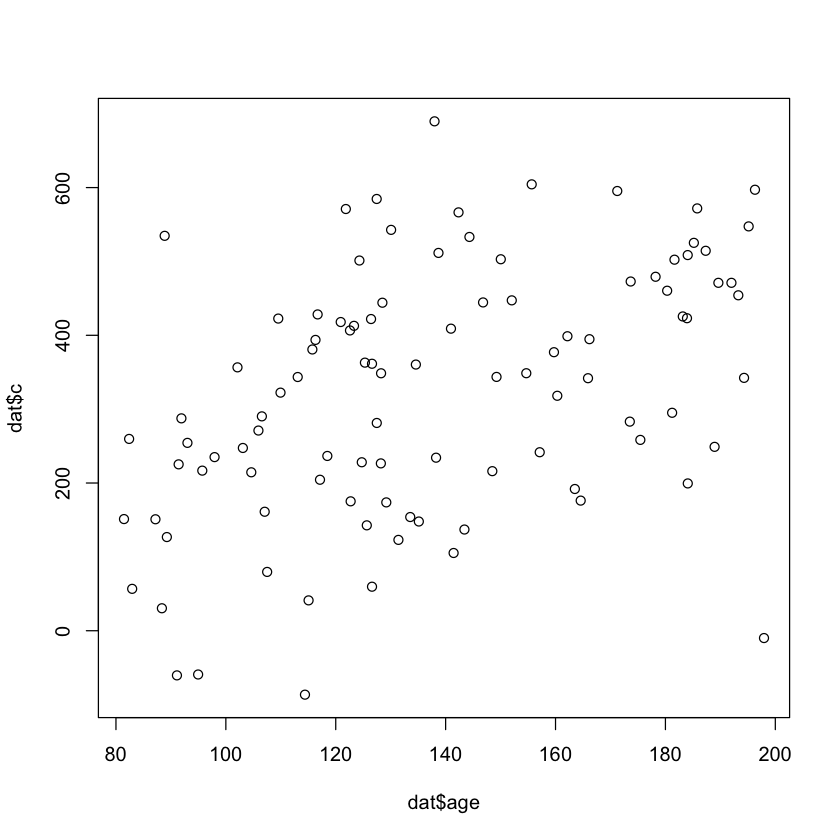

In [19]:
plot(dat$age,dat$c)

b) Plot the relationship between reading experience, age, and reading comprehension.

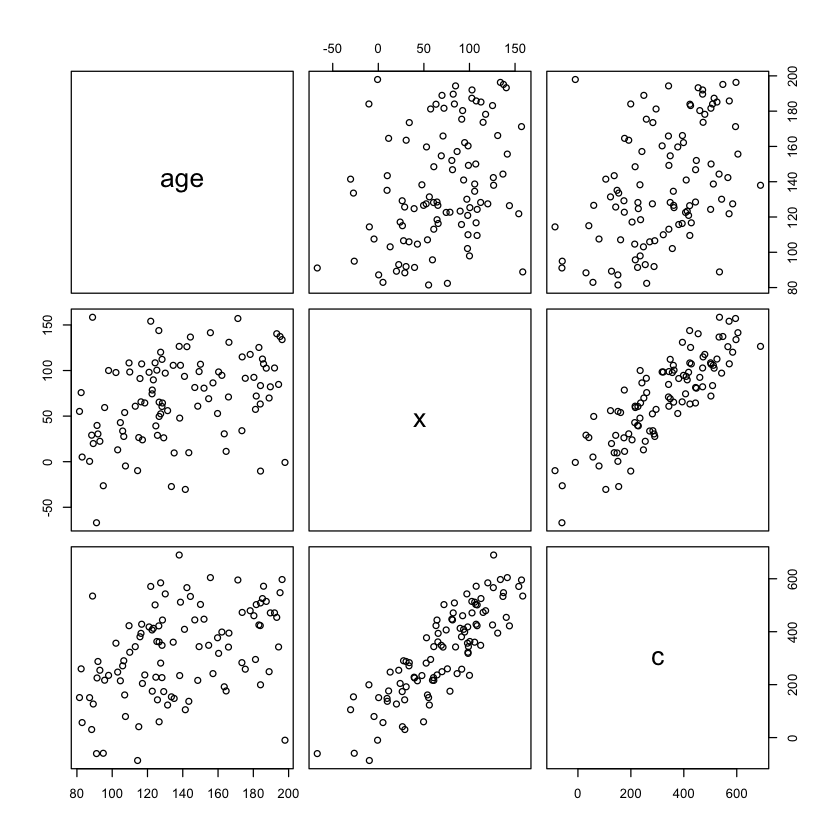

In [20]:
pairs(dat)

---
## 3. Mediation Analysis (3 points)

Load the `mediation` library.

In [21]:
install.packages("mediation")
library(mediation)
library(MASS)


The downloaded binary packages are in
	/var/folders/_b/t7fr6fg53h970lfthzdnkjnr0000gp/T//RtmpR5Fr3o/downloaded_packages


Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [25]:
fitM <- lm(x ~ age, data=dat)
fitY <- lm(c ~ x + age, data=dat)
summary(fitM)
summary(fitY)
fitMed <- mediate(fitM, fitY, treat="age", mediator="x")
summary(fitMed)


Call:
lm(formula = x ~ age, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-114.19  -25.92    2.99   32.91  112.31 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.7318    19.1887   0.142 0.887084    
age           0.4884     0.1352   3.611 0.000483 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.33 on 98 degrees of freedom
Multiple R-squared:  0.1174,	Adjusted R-squared:  0.1084 
F-statistic: 13.04 on 1 and 98 DF,  p-value: 0.0004829



Call:
lm(formula = c ~ x + age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-195.496  -59.869    2.587   68.504  204.405 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.0415    37.4129   0.268  0.78896    
x             2.8746     0.1969  14.597  < 2e-16 ***
age           0.8090     0.2806   2.883  0.00486 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 86.42 on 97 degrees of freedom
Multiple R-squared:  0.7451,	Adjusted R-squared:  0.7398 
F-statistic: 141.8 on 2 and 97 DF,  p-value: < 2.2e-16



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              1.404        0.586         2.26  <2e-16 ***
ADE               0.812        0.251         1.38    0.01 ** 
Total Effect      2.216        1.285         3.18  <2e-16 ***
Prop. Mediated    0.630        0.382         0.87  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 100 


Simulations: 1000 


How do you interpret these results? Why do you think the analysis yielded this result? 
> *The first model shows that there is a significant relationship between reading experience and age. The second model is showing us that when you include reading experience in the model, age is still a significant predictor of reading comprehension. The first line that has ACME in the last model shows us that there is a strong mediating/indirect effect. Looking at ADE, there is a significant direct effect of age while holding reading experience constant. The Total Effect and Prop.Mediated effect is also statistically significant. Overall, the results tell us that the relationship between age and reading comprehension is entirely mediated by reading experience.*
> 

---
## 4. Power Analysis via Simulation (4 points)

Now we're going to use our `simulate_data()` function to conduct a power analysis. The goal is to determine how many participants we would need in order to detect both the mediated and the direct effects in this data. 

*Note: We're going to pretend for the sake of simplicity that we don't have any control over the ages of the children we get (so ages are generated using `runif(sample_size, age_lo, age_hi)`, although of course this would be an unusual situation in reality.*

First, write a function, `run_analysis()`, that takes in simulated data and returns a vector containing the ACME and ADE estimates and p-values (these are the `d0`, `d0.p`, `z0`, and `z0.p` features of the mediated model object, e.g., `fitMed$d0.p`). Print this function's output for the data we simulated previously. 

In [29]:
run_analysis <- function(dat) {
    fitM = lm(x~age, data=dat)
    fitY = lm(c~x+age, data=dat)
    fitMed = mediate (fitM, fitY, treat = "age", mediator = "x")
    
    summary(fitMed)
    
    return(c(fitMed$d0,fitMed$d0.p, fitMed$z0, fitMed$z0.p)) # this outputs the effect size, standard error, and significance for quality metrics 
}
print(run_analysis(dat))

[1] 1.4072997 0.0000000 0.8019071 0.0020000


Next fill in the function `repeat_analysis()` below so that it simulates and analyzes data `num_simulations` times. Store the outputs from each simulation in the `simouts` matrix. Calculate and return the coverage across all the simulations run for both ACME and ADE.

In [44]:
repeat_analysis <- function(num_simulations, alpha, sample_size, age_lo, age_hi,beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
    simouts <- matrix(rep(NA,num_simulations*4), nrow=num_simulations,ncol=4)    
    colnames(simouts) <- c('ACME_est', 'ACME_p', 'ADE_est', 'ADE_p')
    for (i in 1:num_simulations) {
    dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) 
        simouts[i,] <- run_analysis(dat)
    }
    ACME_cov <- mean(simouts[,2] <= alpha)
    ADE_cov <- mean(simouts[,4] <= alpha)
    return(list(ACME_cov = ACME_cov, ADE_cov = ADE_cov))
    }

Now run the `repeat_analysis()` function using the same parameter settings as above, for 10 simulations, with an alpha criterion of 0.01. 

In [45]:
print(repeat_analysis(10,0.01, sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c))


$ACME_cov
[1] 0.7

$ADE_cov
[1] 0.8



Finally, do the same thing (10 simulations, alpha criterion of 0.01) but for 5 different sample sizes: 50, 75, 100, 125, 150. You can do this using `map` (as in the tutorial), or a simple `for` loop, or by calculating each individually. Up to you! This should take around 3 minutes to run. 

In [48]:
samplesize_50=repeat_analysis(10,0.01, 50, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
samplesize_75=repeat_analysis(10,0.01, 75, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
samplesize_100=repeat_analysis(10,0.01, 100, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
samplesize_125=repeat_analysis(10,0.01, 125, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
samplesize_150=repeat_analysis(10,0.01, 150, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)


Print your results. 

In [49]:
print(samplesize_50)
print(samplesize_75)
print(samplesize_100)
print(samplesize_125)
print(samplesize_150)


$ACME_cov
[1] 0.5

$ADE_cov
[1] 0.3

$ACME_cov
[1] 0.8

$ADE_cov
[1] 0.5

$ACME_cov
[1] 0.9

$ADE_cov
[1] 0.6

$ACME_cov
[1] 0.7

$ADE_cov
[1] 0.7

$ACME_cov
[1] 1

$ADE_cov
[1] 0.5



If this were a real power analysis, we'd want to run more simulations per sample size (to get a more precise estimate of power) and we may also want to test out some other values of the parameters we used to simulate our data. However, what would you conclude just based on the results above? 

> *Based on the results above, although we want to run more simulations per sample size, we also have to consider the bias-variance tradeoff. This mean that at a certain point, more simulations with a bigger sample size may not helpful for us to make an inference anymore and we are unable to detect an effect because we have too much noise in the data. This can be seen by the ACME_cov and ADE_cov values increasing when the sample size is 125 and then dropping when the sample size gets to 150.* 
> 

**Given** how we generated the data, why was the direct effect harder to detect than the mediated effect?
> *The direct effect is harder to detect because the mediation pathway can hide the total pathway. Additionally, for our simulated dataset, we restricted age to be a minimum of 80 months and a maximum of 200 months, and created random noise so the data may be skewed or have a non-normal distribution which would affect the ability to detect the direct effect.* 
> 

**DUE:** 5pm EST, April 11, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Jenah Black, Emefa Akwayena*